# Monte Carlo Simulations

The Monte Carlo simulations are diferent methods to perform numerical calculation, better to be understood as "experimental" calculations.

The name "Monte Carlo" where first used by Nicholas Metropolis, John von Neumannn and Stanislav Ulman when they where working in the Manhatan project at Los Alamos during World War II.

The idea behind this method is that knowing some properties of a sistem, lets say statistical properties, we can use them to make predictions. How ever this predictions acuracy depend on the big numer theorems. So to have good prediction we need a suficiently big amount of numbers and the should be random.

# Using Probability to solve a problem
## Buffon's Needle

Lets imagin a plane surface with paralel lines, all separated by the same distance $D$, and lets imagin we drop a needle of length $L$ (Shorter than $D$). 
What is the probability of a needle crosing one line?

We know that the center of the needle can be between 0 and $D$, and that the angle the needle is forming with the lines is $\theta$ between 0 and $2\pi$.

Buffon showed that the probability of the needle intersecting one of the lines is $2D/\pi D$. By randombly tossing lots of needles on this surface we can count the number of crosings and stimate the probability by know the proportion of needles that crosses the lines, lets call it $f$. From here we can estimate the value of $\pi$ by the ecuation:

$$ \pi \approx \frac{2L}{fD}$$



In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Distance from line to line
D = 5
# Lenght of the needles
L = 3
# Number of random number
N = 1000

# Center of the needles
centers = rand(N)*D
# Now we have to calculate the angle randomly

r = np.zeros(N)
yy = np.zeros(N)

# Just for ploting the distribution
x = []
xx = np.zeros(N)
y = []

for i in range(N):
    R = 2
    while R>1:
        X = rand()
        Y = rand()
        R =np.sqrt(X**2 + Y**2)
        # just for showing the chosing criteria
        if R > 1:
            x.append(X)
            y.append(Y)
    r[i] = R
    yy[i] = Y
    xx[i] = X

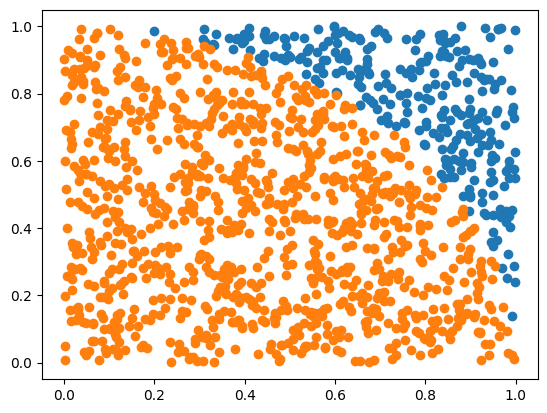

In [2]:

# we want to see the distribution of the posible angles
# In orange are the accepted angles, inside the circle,
plt.scatter(x,y)
plt.scatter(xx,yy)

In [3]:
# we want to know how manky steps where not used
len(x)

285

In [4]:
# Now we calculate the probability
deltay = (L/2)*yy/r

hits = (deltay>=centers) +(deltay>= D-centers)

f = np.mean(hits)
print('The probability is: '+str(f))
# Theroetical probability
Ptheo = (2*L)/(np.pi*D)
Pi_approx = (2*L)/(f*D)

print('The theoretical probability is: '+str(Ptheo))
print('Pi ='+str(Pi_approx))

The probability is: 0.395
The theoretical probability is: 0.38197186342054884
Pi =3.0379746835443036


In [5]:
Pi_approx

np.float64(3.0379746835443036)

We can see that our result is not really accuarate, we may ask the questions: How confident can we be in our result for a given number of trials? How many trials do we need to attain a specific level of confience in the result?

This example is good to identify the important parts of a Monte Carlo simulation.
1. Calculational model of the system of interest.
2. Data requiered by the model.
3. Simulation "Wrapper", this is the proces of looping through the model calculations, selecting different data values from the statistical distributions and recalculating the corresponding parameter of interest.

## Precision

An important part of the model is the determination of the precision associated with the result, or the degree of confidence we have in it. To do this we need many samples, or trials, in each of which we obtain an estimate of $\pi$.

One way of getting more estimates is simply to run the program many times, each with a different set of random numbers, recording the resulting estimate each time. For a program as small like this doing it does not represent a challenge, how ever with more elavorated simulation this may require very powerfull computers.



In [21]:
def Buffon_Monte_Carlo(N=1000):
    # Constants
    D = 5
    L = 3
    # Variables
    centers = rand(N)*D
    r = np.zeros(N)
    yy = np.zeros(N)
    # Monte Carlo loop
    for i in range(N):
        R = 2
        while R>1:
            X = rand()
            Y = rand()
            R =np.sqrt(X**2 + Y**2)
        r[i] = R
        yy[i] = Y
    # Now we calculate the probability
    deltay = (L/2)*yy/r
    hits = (deltay>=centers) +(deltay>= D-centers)
    f = np.mean(hits)
    Pi_approx = (2*L)/(f*D)
    return(Pi_approx)

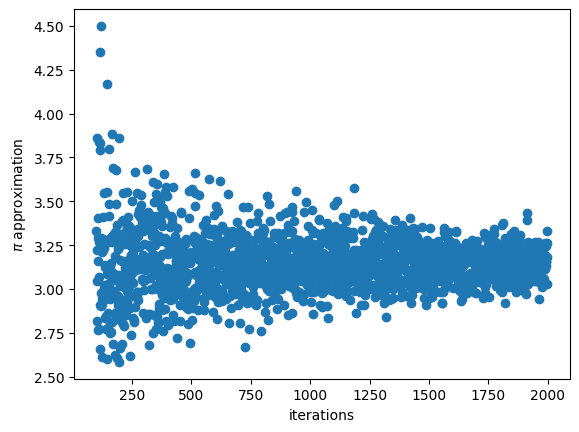

In [32]:
# Showing presition depending on number of needles
results = []
pi_approx = []
i = 100
while i < 2000:
    results.append(i)
    pi_approx.append(Buffon_Monte_Carlo(i))
    i+=1

plt.scatter(results,pi_approx)
plt.xlabel('iterations')
plt.ylabel(r"$\pi$ approximation")
plt.show()

Here we can se that we reach, so to speak, a "normal" presition very fast. Practically there is no diference between 1000 and 2000 iterations. So is necesary to explore a more statistical way to refine the presition. What we will do now is to run the program two tousend times, each time we will do one tousend iterations.

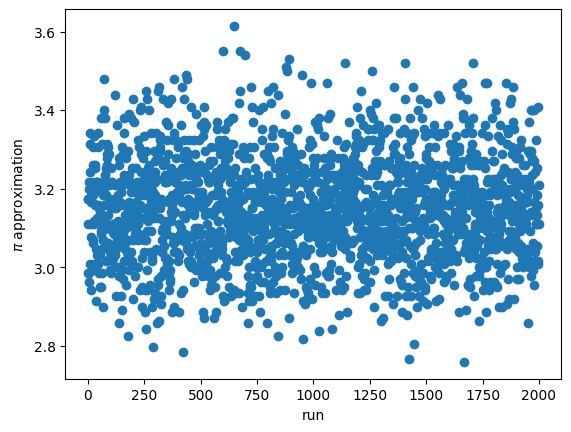

In [35]:
# Showing presition for 2000 runs
results = []
pi_approx = []
for i in range(2000):
    results.append(i)
    pi_approx.append(Buffon_Monte_Carlo(1000))

plt.scatter(results,pi_approx)
plt.xlabel('run')
plt.ylabel(r"$\pi$ approximation")
plt.show()

Now we can generate an histogram of this results to better understand what is happning here. We can se that the distribution of the results looks roughly normal. We should use the overal mean, $\mu$, standar deviation, $\sigma$, and standard error, $se$ from the runs average estimate of $\pi$.

Central limit theorem:
In probability theory, the central limit theorem (CLT) states that, under appropriate conditions, the distribution of a normalized version of the sample mean converges to a standard normal distribution. This holds even if the original variables themselves are not normally distributed. There are several versions of the CLT, each applying in the context of different conditions.

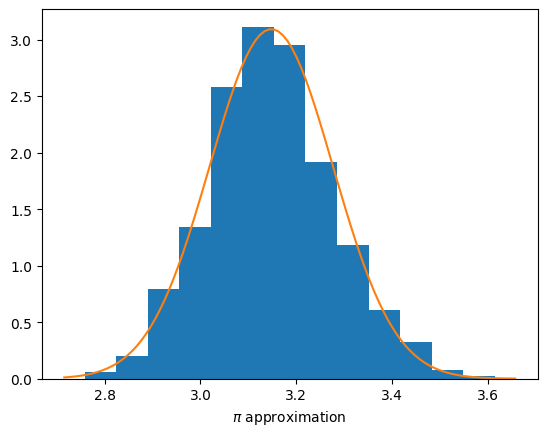

mean =3.148049714892105  Standar deviation =0.1289987581078354


In [48]:
import scipy.stats as stats

plt.hist(pi_approx, bins=13, density=True)
plt.xlabel(r"$\pi$ approximation")

#Mean and stnd_dev
mean = np.mean(pi_approx)
stnd_dv = np.std(pi_approx)

xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mean,stnd_dv)
plt.plot(x,p)
plt.show()

print('mean ='+str(mean)+'  Standar deviation ='+str(stnd_dv))

### Task 1
Picture $n$ bins and $n$ balls. Construct a Monte-Carlo simulation program that randomly scatters the $n$ balls into the bins. 
- Count the number of bins that don't contain any balls, $n_0$.
- Plot the ratio $n/n_0$ as a function of $n$
- To what constant does the ratio seem to be trying for?